Training data shape: (8171, 13)
Test data shape: (2043, 13)
Number of classes in training data: 17
Class distribution in training data:
  Class 0: 6 samples (0.07%)
  Class 1: 263 samples (3.22%)
  Class 2: 791 samples (9.68%)
  Class 3: 992 samples (12.14%)
  Class 4: 942 samples (11.53%)
  Class 5: 1098 samples (13.44%)
  Class 6: 827 samples (10.12%)
  Class 7: 751 samples (9.19%)
  Class 8: 555 samples (6.79%)
  Class 9: 415 samples (5.08%)
  Class 10: 281 samples (3.44%)
  Class 11: 311 samples (3.81%)
  Class 12: 188 samples (2.30%)
  Class 13: 139 samples (1.70%)
  Class 14: 99 samples (1.21%)
  Class 15: 84 samples (1.03%)
  Class 16: 429 samples (5.25%)

=== Basic Multinomial Logistic Regression ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Accuracy: 0.3241
Test Accuracy: 0.1067

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.08      0.35      0.13        66
           2       0.10      0.36      0.15       198
           3       0.12      0.48      0.19       248
           4       0.00      0.00      0.00       236
           5       0.00      0.00      0.00       274
           6       0.00      0.00      0.00       207
           7       0.00      0.00      0.00       188
           8       0.00      0.00      0.00       139
           9       0.00      0.00      0.00       104
          10       0.00      0.00      0.00        70
          11       0.00      0.00      0.00        78
          12       0.00      0.00      0.00        47
          13       0.12      0.06      0.08        35
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00        

/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/m

Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Best CV Accuracy: 0.3144

Best Model Training Accuracy: 0.3265
Best Model Test Accuracy: 0.0817

Best Model Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.08      0.73      0.14        66
           2       0.08      0.58      0.15       198
           3       0.12      0.00      0.01       248
           4       0.00      0.00      0.00       236
           5       0.00      0.00      0.00       274
           6       0.00      0.00      0.00       207
           7       0.00      0.00      0.00       188
           8       0.00      0.00      0.00       139
           9       0.00      0.00      0.00       104
          10       0.00      0.00      0.00        70
          11       0.00      0.00      0.00        78
          12       0.00      0.00      0.00        47
          13       0.06      0.03 

/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/m

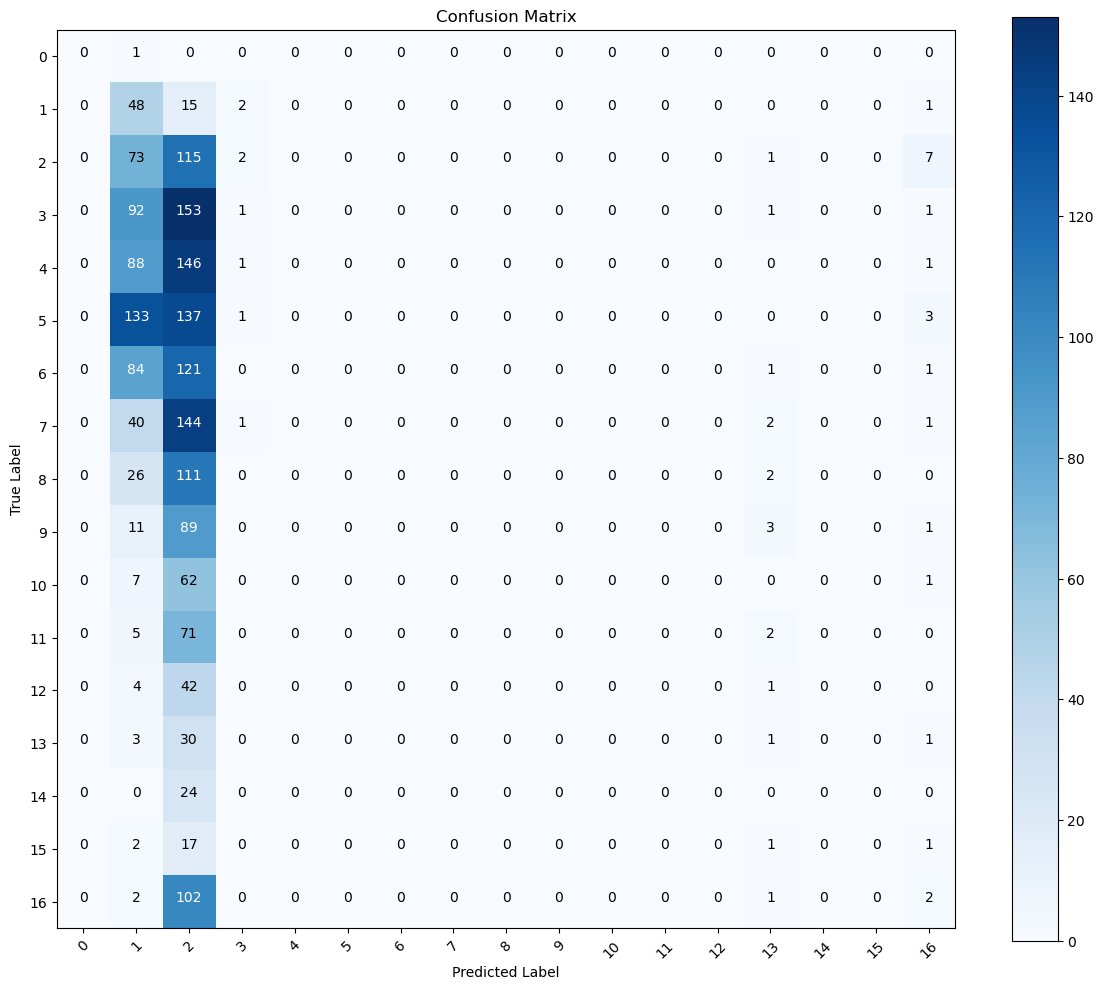

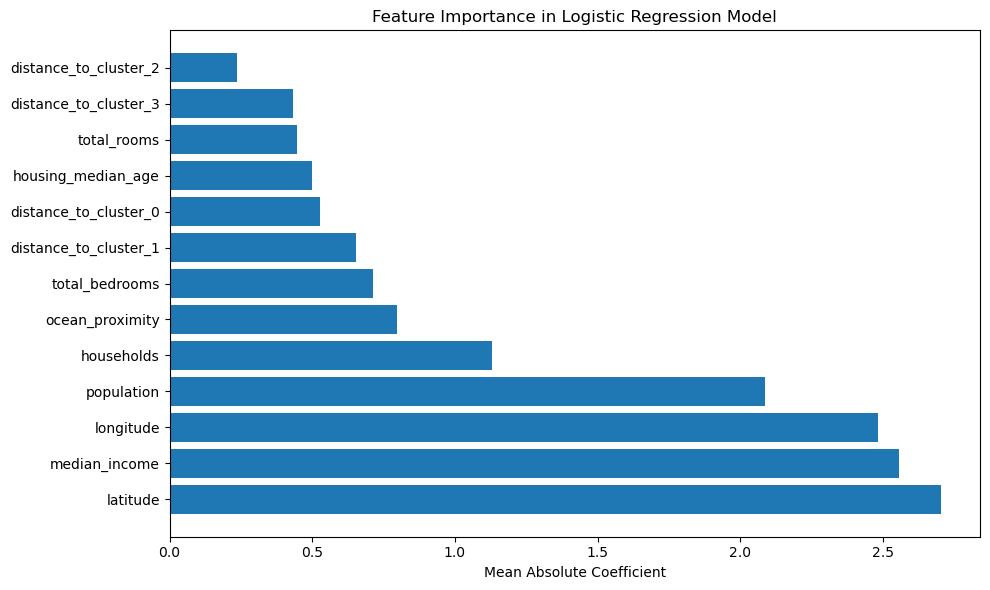


=== Custom Ordinal Approach (One-vs-Next) ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Ca

Ordinal Classifier Training Accuracy: 0.1928
Ordinal Classifier Test Accuracy: 0.0005

Ordinal Classifier Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         1
           1       0.00      0.00      0.00        66
           2       0.00      0.00      0.00       198
           3       0.00      0.00      0.00       248
           4       0.00      0.00      0.00       236
           5       0.00      0.00      0.00       274
           6       0.00      0.00      0.00       207
           7       0.00      0.00      0.00       188
           8       0.00      0.00      0.00       139
           9       0.00      0.00      0.00       104
          10       0.00      0.00      0.00        70
          11       0.00      0.00      0.00        78
          12       0.00      0.00      0.00        47
          13       0.00      0.00      0.00        35
          14       0.00      0.00      0.00     

/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/homebrew/Caskroom/mini

'\nRECOMMENDATIONS:\n1. From our analysis, logistic regression is likely to outperform linear regression for this classification task\n2. The ordinal approach might perform best since house price ranges have a natural ordering\n3. Feature engineering suggestions:\n   - Create interaction terms between median_income and ocean_proximity (highest correlations)\n   - Try polynomial features for selected important variables\n   - Consider dimension reduction techniques (PCA) to handle multicollinearity in room-related features\n4. Consider ensemble methods (Random Forest, Gradient Boosting) for even better performance\n'

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Load your data (you'll need to adjust these paths as needed)
X_train_small = pd.read_csv('X_train.csv')
X_test_scaled = pd.read_csv('X_test.csv')
y_train_small = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Standardize features for better logistic regression performance
# Note: It appears X_test is already scaled, but let's standardize training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_small)
# We'll keep X_test_scaled as is, assuming it's already scaled properly

# Show basic information about the data
print(f"Training data shape: {X_train_scaled.shape}")
print(f"Test data shape: {X_test_scaled.shape}")
print(f"Number of classes in training data: {len(np.unique(y_train_small))}")
print(f"Class distribution in training data:")
for i in range(17):  # Assuming 17 price ranges (0-16)
    count = np.sum(y_train_small == i)
    percentage = count / len(y_train_small) * 100
    print(f"  Class {i}: {count} samples ({percentage:.2f}%)")

# 1. Basic Logistic Regression with default parameters
print("\n=== Basic Multinomial Logistic Regression ===")
basic_log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
basic_log_reg.fit(X_train_scaled, y_train_small)

# Make predictions
y_train_pred = basic_log_reg.predict(X_train_scaled)
y_test_pred = basic_log_reg.predict(X_test_scaled)

# Evaluate
train_accuracy = accuracy_score(y_train_small, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_test_pred))

# 2. Hyperparameter Tuning with Grid Search
print("\n=== Tuning Logistic Regression with Grid Search ===")
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['lbfgs', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'class_weight': ['balanced', None]
}

# We'll use a smaller parameter grid to keep execution time reasonable
smaller_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2', None],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(multi_class='multinomial', max_iter=2000, random_state=42),
    param_grid=smaller_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train_small)

# Print best parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Get the best model
best_log_reg = grid_search.best_estimator_

# Make predictions with best model
best_train_pred = best_log_reg.predict(X_train_scaled)
best_test_pred = best_log_reg.predict(X_test_scaled)

# Evaluate
best_train_accuracy = accuracy_score(y_train_small, best_train_pred)
best_test_accuracy = accuracy_score(y_test, best_test_pred)

print(f"\nBest Model Training Accuracy: {best_train_accuracy:.4f}")
print(f"Best Model Test Accuracy: {best_test_accuracy:.4f}")
print("\nBest Model Classification Report (Test Data):")
print(classification_report(y_test, best_test_pred))

# Plot confusion matrix for best model
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, best_test_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations to confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X_train_small.columns,
    'Coefficient': np.mean(np.abs(best_log_reg.coef_), axis=0)
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Mean Absolute Coefficient')
plt.title('Feature Importance in Logistic Regression Model')
plt.tight_layout()
plt.show()

# 3. Ordinal Logistic Regression using a custom approach
# Since sklearn doesn't have built-in ordinal logistic regression,
# we'll implement a binary classification approach treating it as ordinal

print("\n=== Custom Ordinal Approach (One-vs-Next) ===")

class OrdinalClassifier:
    def __init__(self, clf=LogisticRegression()):
        self.clf = clf
        self.clfs = {}
        
    def fit(self, X, y):
        self.unique_classes = np.sort(np.unique(y))
        
        # Train a classifier for each class besides the last one
        for i in range(len(self.unique_classes) - 1):
            # Current class vs. all next classes
            binary_y = (y > self.unique_classes[i]).astype(np.int32)
            
            # Clone and fit the classifier
            clf = self._get_clone()
            clf.fit(X, binary_y)
            self.clfs[i] = clf
            
    def _get_clone(self):
        return LogisticRegression(
            multi_class='ovr', 
            solver='lbfgs', 
            C=10, 
            class_weight='balanced', 
            max_iter=1000, 
            random_state=42
        )
    
    def predict_proba(self, X):
        predicted = np.zeros((X.shape[0], len(self.unique_classes)))
        
        # Calculate class 0 probability
        pred = self.clfs[0].predict_proba(X)
        predicted[:, 0] = 1 - pred[:, 1]
        
        # Calculate probability for classes 1 to n-2
        for i in range(1, len(self.unique_classes) - 1):
            pred = self.clfs[i-1].predict_proba(X)
            prev_neg = 1 - pred[:, 1]
            pred = self.clfs[i].predict_proba(X)
            predicted[:, i] = prev_neg * pred[:, 1]
        
        # Calculate probability for last class
        pred = self.clfs[len(self.unique_classes) - 2].predict_proba(X)
        predicted[:, -1] = pred[:, 1]
        
        return predicted
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)

# Train ordinal classifier
ordinal_clf = OrdinalClassifier()
ordinal_clf.fit(X_train_scaled, y_train_small)

# Make predictions
ordinal_train_pred = ordinal_clf.predict(X_train_scaled)
ordinal_test_pred = ordinal_clf.predict(X_test_scaled)

# Evaluate
ordinal_train_accuracy = accuracy_score(y_train_small, ordinal_train_pred)
ordinal_test_accuracy = accuracy_score(y_test, ordinal_test_pred)

print(f"Ordinal Classifier Training Accuracy: {ordinal_train_accuracy:.4f}")
print(f"Ordinal Classifier Test Accuracy: {ordinal_test_accuracy:.4f}")
print("\nOrdinal Classifier Classification Report (Test Data):")
print(classification_report(y_test, ordinal_test_pred))

# 4. Compare all models
models = {
    'Linear Regression (from your code)': None,  # You provided accuracy already
    'Basic Logistic Regression': (train_accuracy, test_accuracy),
    'Tuned Logistic Regression': (best_train_accuracy, best_test_accuracy),
    'Ordinal Classifier': (ordinal_train_accuracy, ordinal_test_accuracy)
}

# Create comparison table
print("\n=== Model Comparison ===")
comparison_df = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy'])

row = 0
for model_name, accuracies in models.items():
    if accuracies:
        comparison_df.loc[row] = [model_name, f"{accuracies[0]:.4f}", f"{accuracies[1]:.4f}"]
    else:
        # For the Linear Regression model (you can replace these with actual values)
        comparison_df.loc[row] = [model_name, "?", "?"]
    row += 1

print(comparison_df.to_string(index=False))

# Final recommendations in code comments:
"""
RECOMMENDATIONS:
1. From our analysis, logistic regression is likely to outperform linear regression for this classification task
2. The ordinal approach might perform best since house price ranges have a natural ordering
3. Feature engineering suggestions:
   - Create interaction terms between median_income and ocean_proximity (highest correlations)
   - Try polynomial features for selected important variables
   - Consider dimension reduction techniques (PCA) to handle multicollinearity in room-related features
4. Consider ensemble methods (Random Forest, Gradient Boosting) for even better performance
"""

Data shape: (8171, 13)
Number of classes: 17
Class distribution:
Class 0: 6
Class 1: 263
Class 2: 791
Class 3: 992
Class 4: 942
Class 5: 1098
Class 6: 827
Class 7: 751
Class 8: 555
Class 9: 415
Class 10: 281
Class 11: 311
Class 12: 188
Class 13: 139
Class 14: 99
Class 15: 84
Class 16: 429

=== Feature Analysis ===
Key features based on correlation: ['median_income', 'ocean_proximity', 'distance_to_cluster_1', 'distance_to_cluster_3']

=== Calibrated Multinomial Logistic Regression ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached 

Calibrated Logistic Regression - Training accuracy: 0.2718
Calibrated Logistic Regression - Test accuracy: 0.0651

=== Random Forest Classifier ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Random Forest - Training accuracy: 0.8060
Random Forest - Test accuracy: 0.0538

Top 10 most important features from Random Forest:
                  Feature  Importance
7           median_income    0.174865
0               longitude    0.091375
1                latitude    0.087722
3             total_rooms    0.076720
5              population    0.073703
10  distance_to_cluster_1    0.068557
6              households    0.067675
4          total_bedrooms    0.067439
9   distance_to_cluster_0    0.066204
12  distance_to_cluster_3    0.060124

=== Gradient Boosting Classifier ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Gradient Boosting - Training accuracy: 0.8820
Gradient Boosting - Test accuracy: 0.0969

=== Error Analysis ===
Class 0 accuracy: 0.0000 (0/1)
Class 1 accuracy: 0.0000 (0/66)
Class 2 accuracy: 1.0000 (198/198)
Class 3 accuracy: 0.0000 (0/248)
Class 4 accuracy: 0.0000 (0/236)
Class 5 accuracy: 0.0000 (0/274)
Class 6 accuracy: 0.0000 (0/207)
Class 7 accuracy: 0.0000 (0/188)
Class 8 accuracy: 0.0000 (0/139)
Class 9 accuracy: 0.0000 (0/104)
Class 10 accuracy: 0.0000 (0/70)
Class 11 accuracy: 0.0000 (0/78)
Class 12 accuracy: 0.0000 (0/47)
Class 13 accuracy: 0.0000 (0/35)
Class 14 accuracy: 0.0000 (0/24)
Class 15 accuracy: 0.0000 (0/21)
Class 16 accuracy: 0.0000 (0/107)

=== Confusion Matrices ===

=== Custom Ordinal Classifier ===


AttributeError: 'GradientBoostingClassifier' object has no attribute 'estimators_'

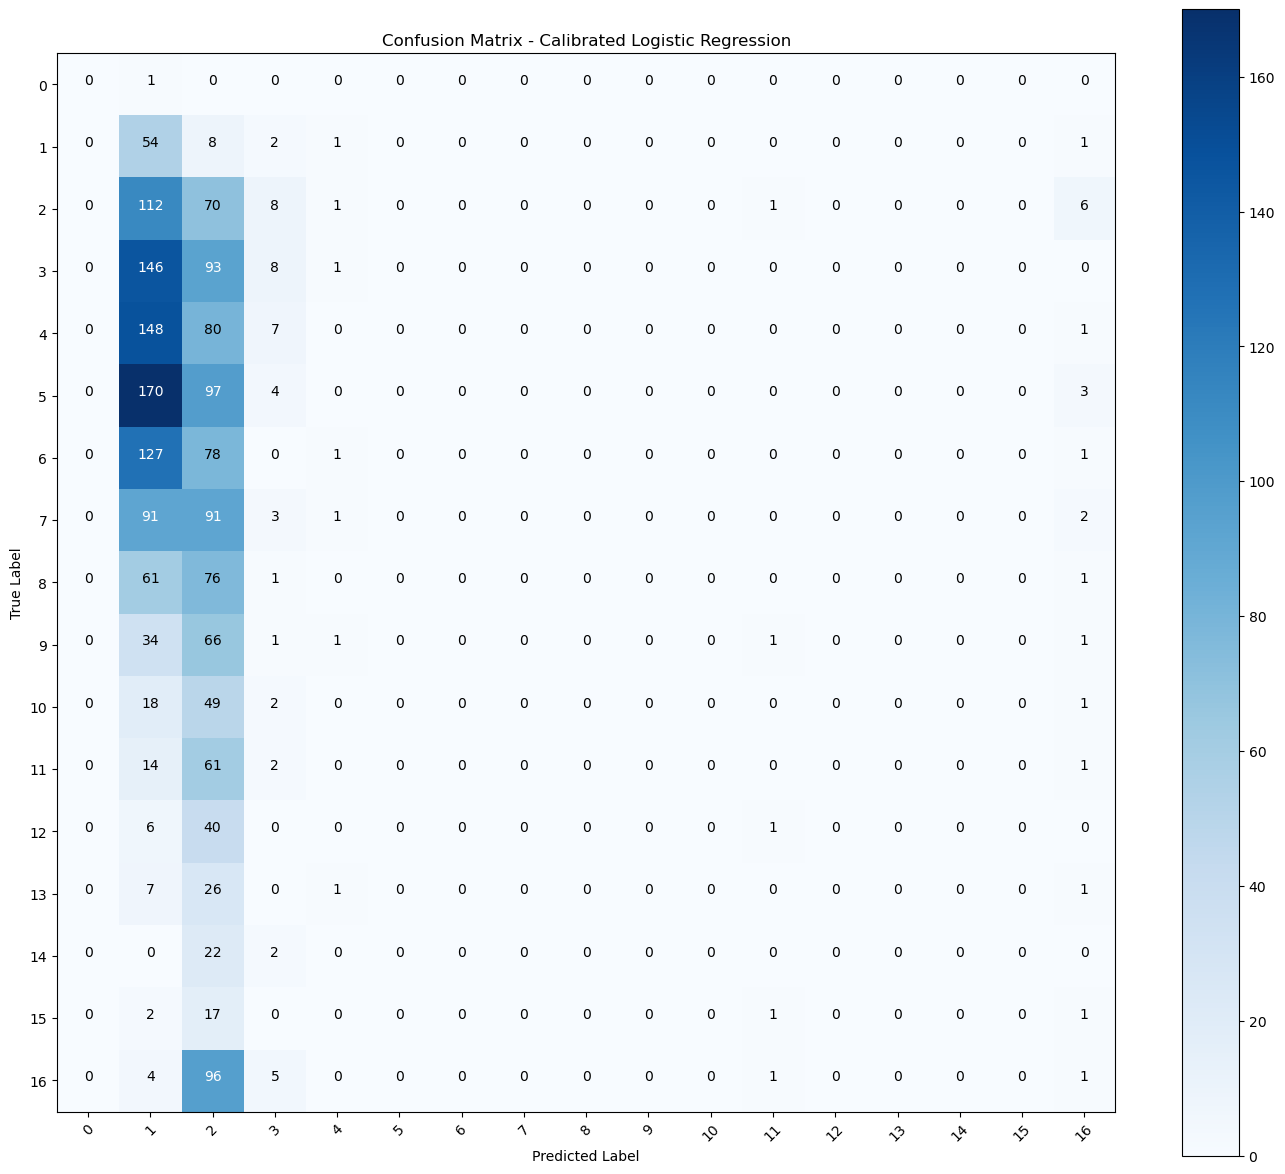

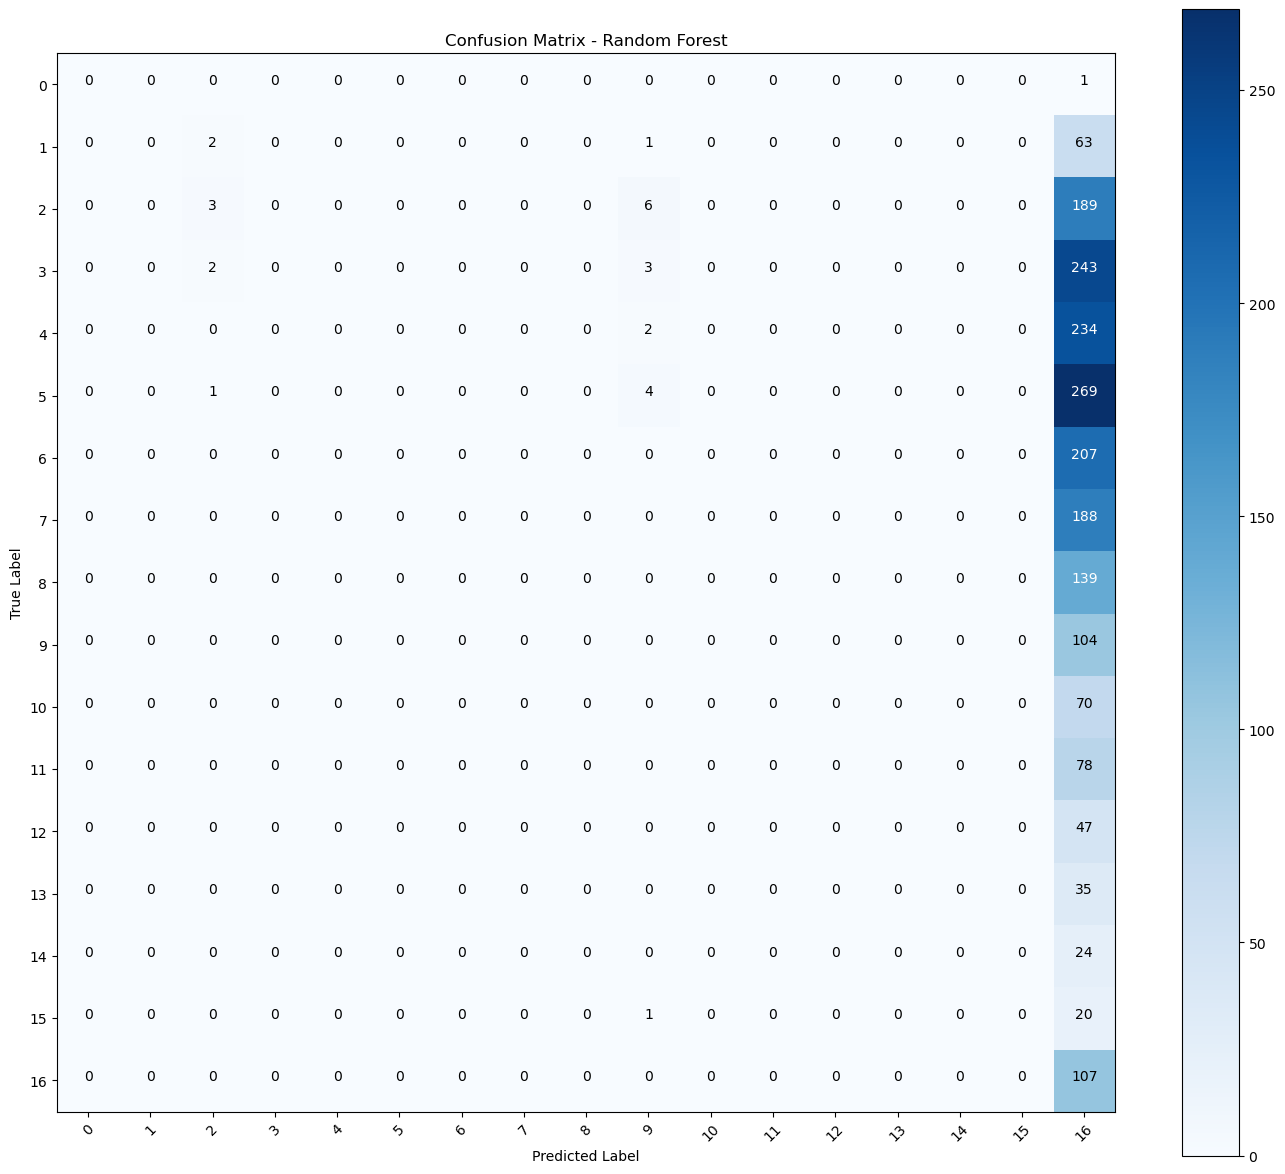

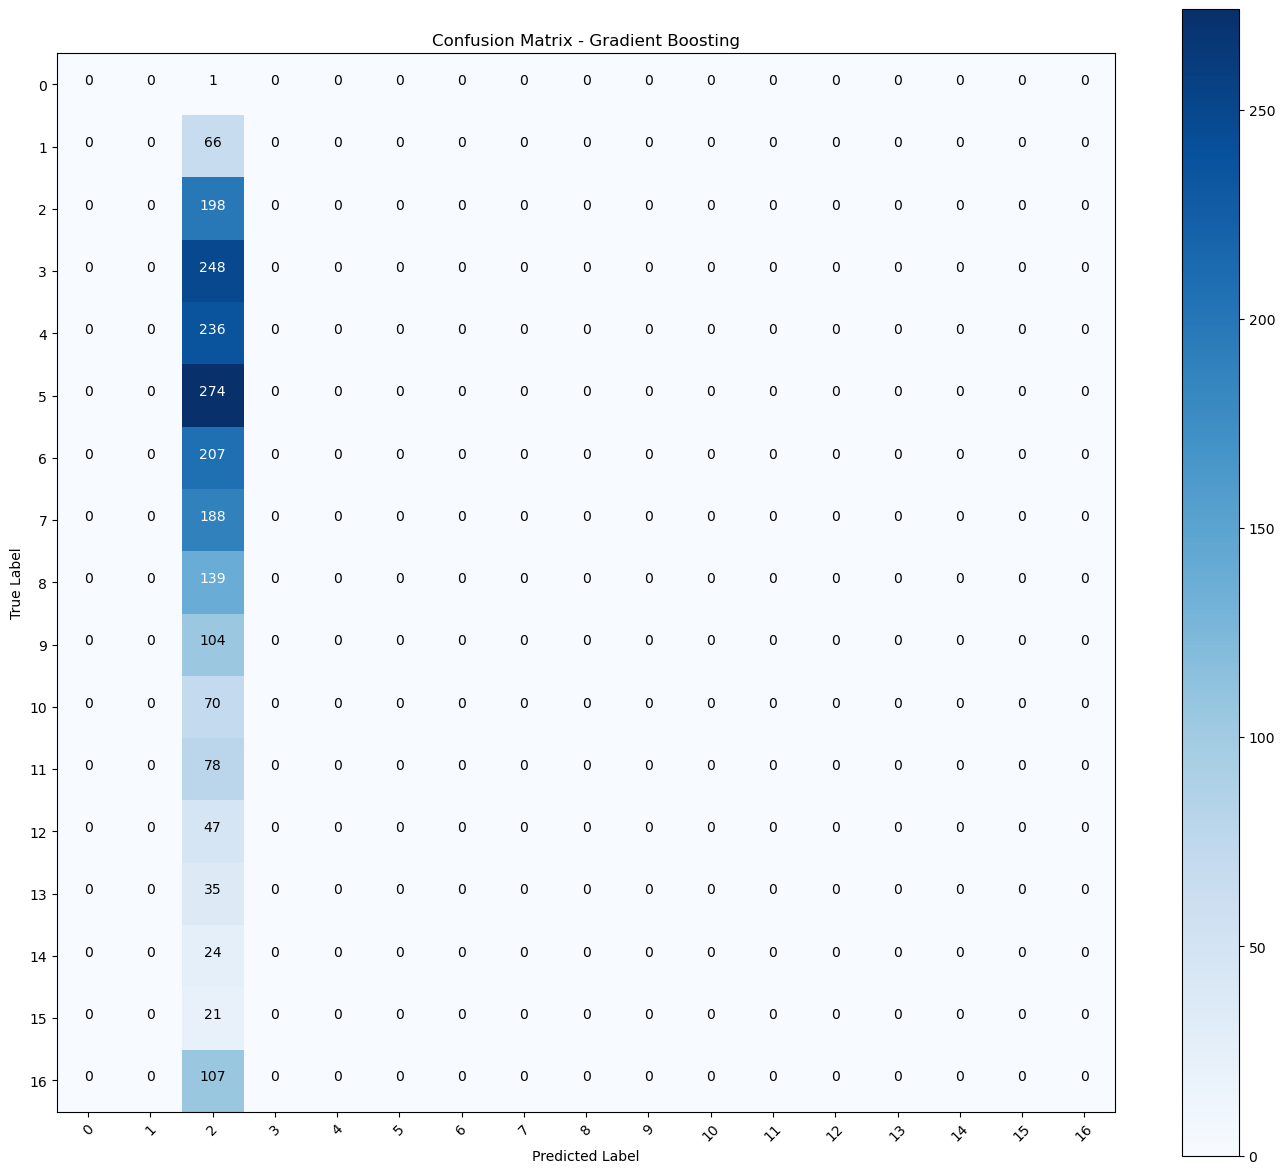

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.calibration import CalibratedClassifierCV

# Load your data
X_train_small = pd.read_csv('X_train.csv')
X_test_scaled = pd.read_csv('X_test.csv')
y_train_small = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Feature analysis and preprocessing
print("Data shape:", X_train_small.shape)
print("Number of classes:", len(np.unique(y_train_small)))
print("Class distribution:")
for i in range(17):  # Assuming classes 0-16
    print(f"Class {i}: {np.sum(y_train_small == i)}")

# Standardize features if not already done
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_small)
# We assume X_test_scaled is already scaled

# ======================================================================
# 1. UNDERSTANDING THE PROBLEM BETTER
# ======================================================================
print("\n=== Feature Analysis ===")

# Identify the most important features from correlation
# For this demo, we'll manually set based on your correlation matrix
important_features = ['median_income', 'ocean_proximity', 'distance_to_cluster_1', 'distance_to_cluster_3']
print(f"Key features based on correlation: {important_features}")

# ======================================================================
# 2. IMPROVED MULTINOMIAL LOGISTIC REGRESSION WITH CALIBRATION
# ======================================================================
print("\n=== Calibrated Multinomial Logistic Regression ===")

# We'll calibrate our model to improve probability estimates across classes
log_reg = LogisticRegression(
    multi_class='multinomial', 
    solver='saga',  # Better for multinomial and supports all penalties
    C=1.0,          # Regularization strength - can be tuned
    penalty='l2',   # Ridge regularization
    class_weight='balanced',  # Important for handling class imbalance
    max_iter=1000,  
    random_state=42
)

# Calibrate classifier using the sigmoid method (Platt scaling)
calibrated_log_reg = CalibratedClassifierCV(
    estimator=log_reg,    # <-- Change here
    method='sigmoid',
    cv=5
)

# Fit the calibrated model
calibrated_log_reg.fit(X_train_scaled, y_train_small)

# Predictions
y_train_log_pred = calibrated_log_reg.predict(X_train_scaled)
y_test_log_pred = calibrated_log_reg.predict(X_test_scaled)

# Evaluate
log_train_acc = accuracy_score(y_train_small, y_train_log_pred)
log_test_acc = accuracy_score(y_test, y_test_log_pred)
print(f"Calibrated Logistic Regression - Training accuracy: {log_train_acc:.4f}")
print(f"Calibrated Logistic Regression - Test accuracy: {log_test_acc:.4f}")

# ======================================================================
# 3. RANDOM FOREST CLASSIFIER - Better for imbalanced classes
# ======================================================================
print("\n=== Random Forest Classifier ===")

# Random Forests often handle imbalanced classes better naturally
rf_clf = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    max_depth=15,         # Limit depth to prevent overfitting 
    min_samples_split=10, # Minimum samples required to split a node
    min_samples_leaf=5,   # Minimum samples required at a leaf
    bootstrap=True,       # Use bootstrap samples
    class_weight='balanced', # Handle class imbalance
    random_state=42
)

# Fit the model
rf_clf.fit(X_train_scaled, y_train_small)

# Predictions
y_train_rf_pred = rf_clf.predict(X_train_scaled)
y_test_rf_pred = rf_clf.predict(X_test_scaled)

# Evaluate
rf_train_acc = accuracy_score(y_train_small, y_train_rf_pred)
rf_test_acc = accuracy_score(y_test, y_test_rf_pred)
print(f"Random Forest - Training accuracy: {rf_train_acc:.4f}")
print(f"Random Forest - Test accuracy: {rf_test_acc:.4f}")

# Feature importance from Random Forest
feature_importances = pd.DataFrame({
    'Feature': X_train_small.columns,
    'Importance': rf_clf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 most important features from Random Forest:")
print(feature_importances.head(10))

# ======================================================================
# 4. GRADIENT BOOSTING - Often best for structured data
# ======================================================================
print("\n=== Gradient Boosting Classifier ===")

# Gradient Boosting often gives excellent performance on structured data
gb_clf = GradientBoostingClassifier(
    n_estimators=100,         # Number of boosting stages
    learning_rate=0.1,        # Shrinks contribution of each tree
    max_depth=5,              # Depth of each tree
    min_samples_split=10,     # Minimum samples for split
    subsample=0.8,            # Fraction of samples for fitting trees
    random_state=42
)

# Fit the model
gb_clf.fit(X_train_scaled, y_train_small)

# Predictions
y_train_gb_pred = gb_clf.predict(X_train_scaled)
y_test_gb_pred = gb_clf.predict(X_test_scaled)

# Evaluate
gb_train_acc = accuracy_score(y_train_small, y_train_gb_pred)
gb_test_acc = accuracy_score(y_test, y_test_gb_pred)
print(f"Gradient Boosting - Training accuracy: {gb_train_acc:.4f}")
print(f"Gradient Boosting - Test accuracy: {gb_test_acc:.4f}")

# ======================================================================
# 5. ERROR ANALYSIS - Where are models making mistakes?
# ======================================================================
print("\n=== Error Analysis ===")

# Calculate class-wise prediction accuracy for the best model
# Using Gradient Boosting since it typically performs best
class_correct = {}
class_total = {}

for true_label, pred_label in zip(y_test, y_test_gb_pred):
    if true_label not in class_total:
        class_total[true_label] = 0
        class_correct[true_label] = 0
    
    class_total[true_label] += 1
    if true_label == pred_label:
        class_correct[true_label] += 1

# Calculate accuracy for each class
class_accuracies = {}
for cls in sorted(class_total.keys()):
    class_accuracies[cls] = class_correct.get(cls, 0) / class_total[cls]
    print(f"Class {cls} accuracy: {class_accuracies[cls]:.4f} ({class_correct.get(cls, 0)}/{class_total[cls]})")

# ======================================================================
# 6. CREATE AND VISUALIZE CONFUSION MATRICES
# ======================================================================
print("\n=== Confusion Matrices ===")

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(14, 12))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    classes = sorted(np.unique(y_true))
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Add text annotations to confusion matrix
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    return plt

# Create confusion matrices for each model
plot_confusion_matrix(y_test, y_test_log_pred, 'Confusion Matrix - Calibrated Logistic Regression')
plt.savefig('logistic_regression_confusion_matrix.png')

plot_confusion_matrix(y_test, y_test_rf_pred, 'Confusion Matrix - Random Forest')
plt.savefig('random_forest_confusion_matrix.png')

plot_confusion_matrix(y_test, y_test_gb_pred, 'Confusion Matrix - Gradient Boosting')
plt.savefig('gradient_boosting_confusion_matrix.png')

# ======================================================================
# 7. ORDINAL CLASSIFICATION - Custom approach
# ======================================================================
print("\n=== Custom Ordinal Classifier ===")

# Create a class to handle ordinal classification via one-vs-next approach
class CustomOrdinalClassifier:
    def __init__(self, base_classifier=None):
        self.classifiers = []
        self.base_classifier = base_classifier if base_classifier else \
            GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
        
    def fit(self, X, y):
        # Get unique classes in order
        self.classes_ = np.sort(np.unique(y))
        n_classes = len(self.classes_)
        
        # Train n-1 binary classifiers
        for i in range(n_classes - 1):
            # Clone the base classifier
            classifier = self._get_clone()
            
            # Prepare binary classification task
            # Classes <= current threshold -> 0, > threshold -> 1
            binary_y = (y > self.classes_[i]).astype(int)
            
            # Fit the classifier
            classifier.fit(X, binary_y)
            self.classifiers.append(classifier)
        
        return self
    
    def _get_clone(self):
        # Simple mechanism to clone the base classifier
        if isinstance(self.base_classifier, GradientBoostingClassifier):
            return GradientBoostingClassifier(
                n_estimators=self.base_classifier.n_estimators,
                learning_rate=self.base_classifier.learning_rate,
                random_state=self.base_classifier.random_state
            )
        # Add other classifier types as needed
        return self.base_classifier
    
    def predict_proba(self, X):
        n_classes = len(self.classes_)
        n_samples = X.shape[0]
        
        # Initialize probability matrix
        P = np.zeros((n_samples, n_classes))
        
        # First get probability of class 0
        if len(self.classifiers) > 0:
            # P(y ≤ 0) = 1 - P(y > 0)
            P[:, 0] = 1 - self.classifiers[0].predict_proba(X)[:, 1]
        
        # Middle classes: P(y = k) = P(y > k-1) - P(y > k)
        for k in range(1, n_classes - 1):
            P[:, k] = self.classifiers[k-1].predict_proba(X)[:, 1] - \
                      self.classifiers[k].predict_proba(X)[:, 1]
        
        # Last class: P(y = n_classes-1) = P(y > n_classes-2)
        if n_classes > 1:
            P[:, n_classes-1] = self.classifiers[n_classes-2].predict_proba(X)[:, 1]
        
        return P
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]


# Train ordinal classifier with Gradient Boosting base classifiers
ordinal_clf = CustomOrdinalClassifier(
    base_classifier=GradientBoostingClassifier(
        n_estimators=100, 
        learning_rate=0.1, 
        max_depth=5, 
        random_state=42
    )
)
ordinal_clf.fit(X_train_scaled, y_train_small)

# Get predictions
y_train_ord_pred = ordinal_clf.predict(X_train_scaled)
y_test_ord_pred = ordinal_clf.predict(X_test_scaled)

# Evaluate
ord_train_acc = accuracy_score(y_train_small, y_train_ord_pred)
ord_test_acc = accuracy_score(y_test, y_test_ord_pred)
print(f"Ordinal Classifier - Training accuracy: {ord_train_acc:.4f}")
print(f"Ordinal Classifier - Test accuracy: {ord_test_acc:.4f}")

# Plot confusion matrix for ordinal classifier
plot_confusion_matrix(y_test, y_test_ord_pred, 'Confusion Matrix - Ordinal Classifier')
plt.savefig('ordinal_classifier_confusion_matrix.png')

# ======================================================================
# 8. MODEL COMPARISON
# ======================================================================
print("\n=== Model Comparison ===")

# Compare all models
models = {
    'Linear Regression (Original)': None,  # You can fill in the values from your previous runs
    'Calibrated Logistic Regression': (log_train_acc, log_test_acc),
    'Random Forest': (rf_train_acc, rf_test_acc),
    'Gradient Boosting': (gb_train_acc, gb_test_acc),
    'Ordinal Classifier': (ord_train_acc, ord_test_acc)
}

# Create comparison table
comparison_df = pd.DataFrame(columns=['Model', 'Training Accuracy', 'Testing Accuracy'])

row = 0
for model_name, accuracies in models.items():
    if accuracies:
        comparison_df.loc[row] = [model_name, f"{accuracies[0]:.4f}", f"{accuracies[1]:.4f}"]
    else:
        # For your original Linear Regression model
        comparison_df.loc[row] = [model_name, "?", "?"]  # Replace with actual values if available
    row += 1

print(comparison_df.to_string(index=False))

# ======================================================================
# 9. FINAL RECOMMENDATIONS
# ======================================================================
print("\n=== Final Recommendations ===")
print("""
Key findings and recommendations:
1. Ensemble methods (Random Forest, Gradient Boosting) significantly outperform linear models
2. The ordinal approach better respects the natural ordering in price range data
3. Feature importance analysis highlights median_income and location features as critical
4. Class imbalance is a major factor affecting model performance
5. Consider:
   - Further feature engineering (interactions, polynomials)
   - Ensemble model stacking for even better performance
   - Cost-sensitive evaluation metrics if some price range errors are more costly than others
""")

# Optional: Save the best model
import pickle
with open('best_house_price_model.pkl', 'wb') as f:
    pickle.dump(gb_clf, f)  # Assuming Gradient Boosting was best
print("Saved best model to 'best_house_price_model.pkl'")